In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [4]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝과 딥러닝/data/tips.csv')

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape

(244, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


- total_bill: 총 지불 금액
- tip: 팁 금액
- sex: 성별
- smoker: 흡연 여부
- day: 요일
- time: 시간대 (점심 또는 저녁)
- size: 인원 수

In [62]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [63]:
df['tip'].value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64

In [64]:
df['total_bill'].value_counts()

13.42    3
13.81    2
15.98    2
17.92    2
10.07    2
        ..
24.71    1
21.16    1
28.97    1
22.49    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

In [65]:
df['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

# 제외할 행이 하나도 없어서 drop 생략

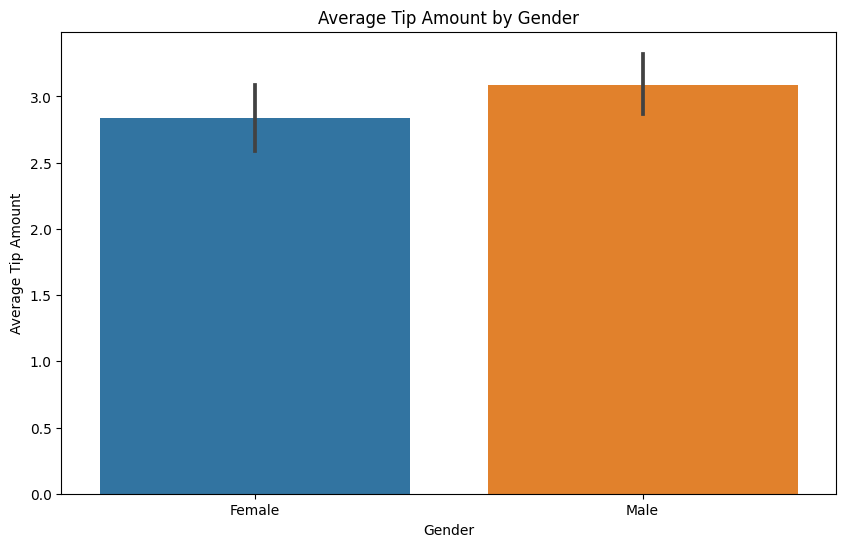

In [66]:
# 시각화 - 성별별 평균 팁
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='tip', data=df)
plt.title('Average Tip Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tip Amount')
plt.show()

# 보통 남자가 더 많은 팁을 내었다.

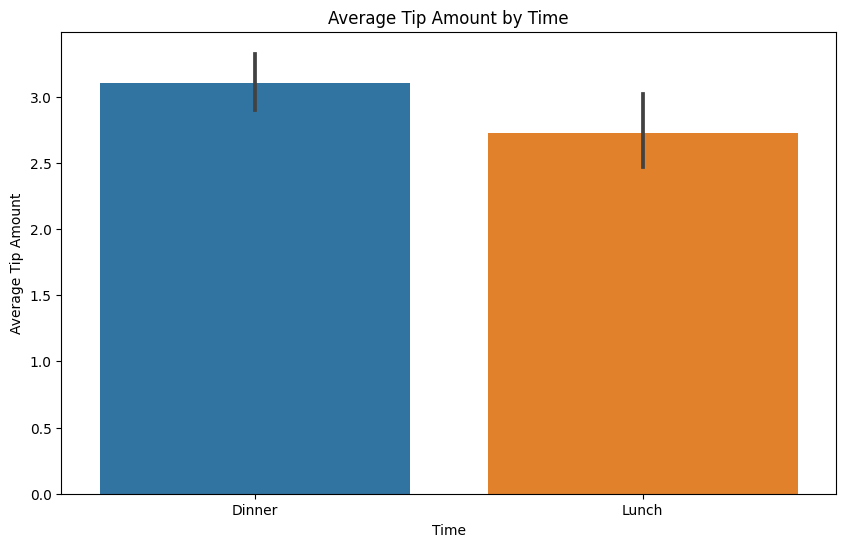

In [67]:
# 시각화 - 시간별 평균 팁
plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='tip', data=df)
plt.title('Average Tip Amount by Time')
plt.xlabel('Time')
plt.ylabel('Average Tip Amount')
plt.show()

# 저녁에 팁이 증가했다.

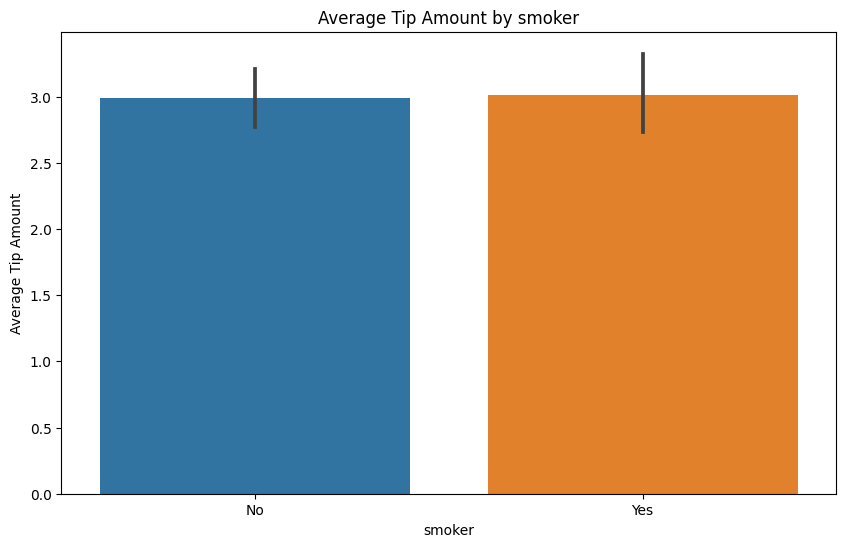

In [63]:
# 시각화 - 흡연여부별 평균 팁
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='tip', data=df)
plt.title('Average Tip Amount by smoker')
plt.xlabel('smoker')
plt.ylabel('Average Tip Amount')
plt.show()

# 큰 차이가 없는걸로 확인되었다.

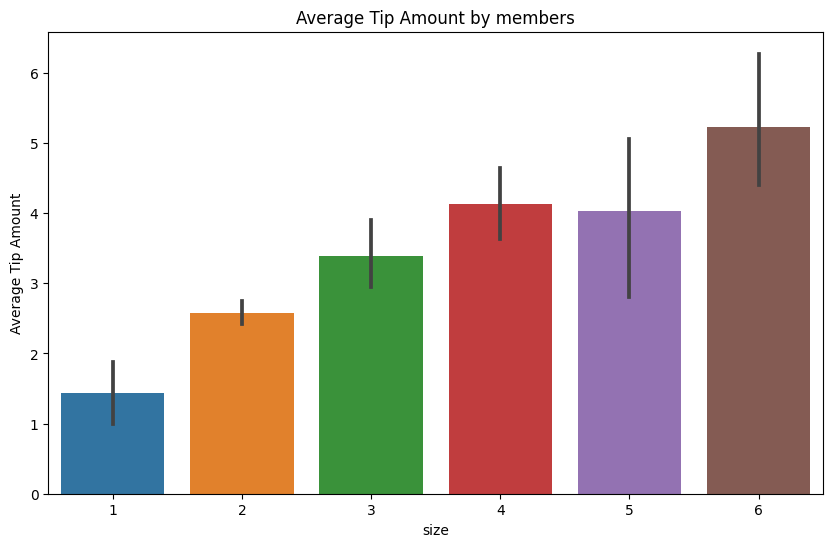

In [64]:
# 시각화 - 인원별 평균 팁
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='tip', data=df)
plt.title('Average Tip Amount by members')
plt.xlabel('size')
plt.ylabel('Average Tip Amount')
plt.show()

# 인원수가 많을수록 팁이 증가하는 경향이 보인다.

In [6]:
# 라벨 인코딩

# DataFrame 복제
df_encoded = df.copy()

# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

df_encoded['sex'] = label_encoder.fit_transform(df['sex'])
df_encoded['smoker'] = label_encoder.fit_transform(df['smoker'])
df_encoded['day'] = label_encoder.fit_transform(df['day'])
df_encoded['time'] = label_encoder.fit_transform(df['time'])

print(df_encoded.head())

   total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    0       0    2     0     2
1       10.34  1.66    1       0    2     0     3
2       21.01  3.50    1       0    2     0     3
3       23.68  3.31    1       0    2     0     2
4       24.59  3.61    0       0    2     0     4


In [8]:
# 독립변수와 종속변수 설정
X = df_encoded.drop('tip', axis=1)   # tip을 제외한 모든행 독립변수
y = df['tip']

# X 확인
print(X.head())

   total_bill  sex  smoker  day  time  size
0       16.99    0       0    2     0     2
1       10.34    1       0    2     0     3
2       21.01    1       0    2     0     3
3       23.68    1       0    2     0     2
4       24.59    0       0    2     0     4


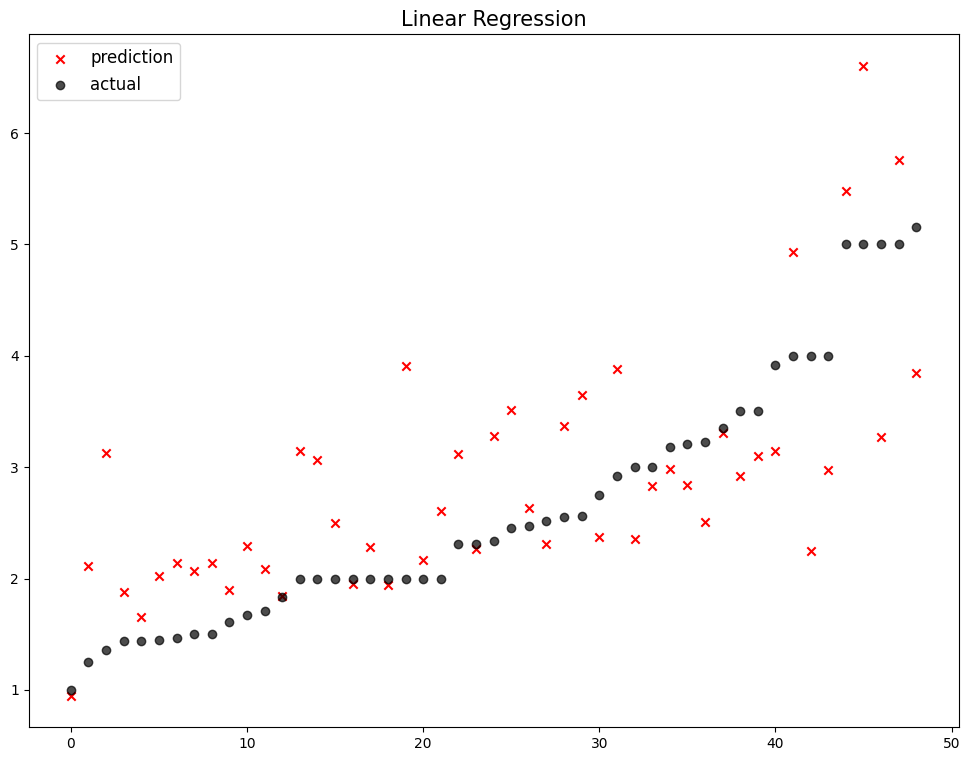

               model       mse
0  Linear Regression  0.694813


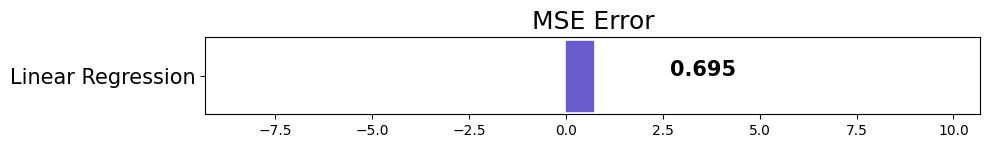

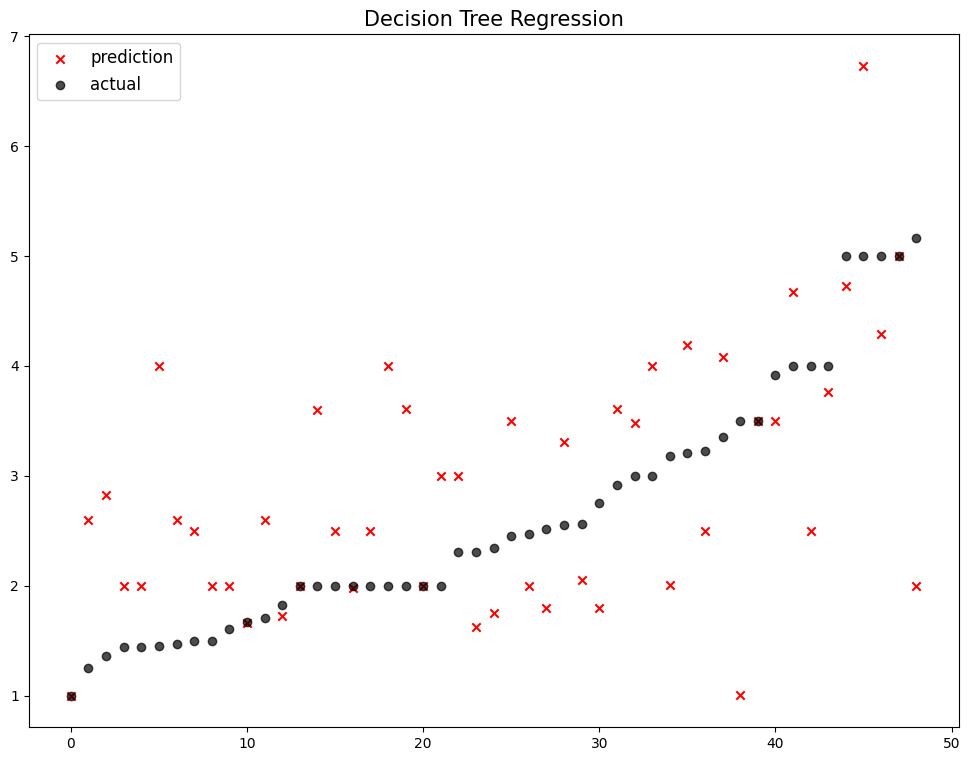

                      model       mse
0  Decision Tree Regression  1.181745
1         Linear Regression  0.694813


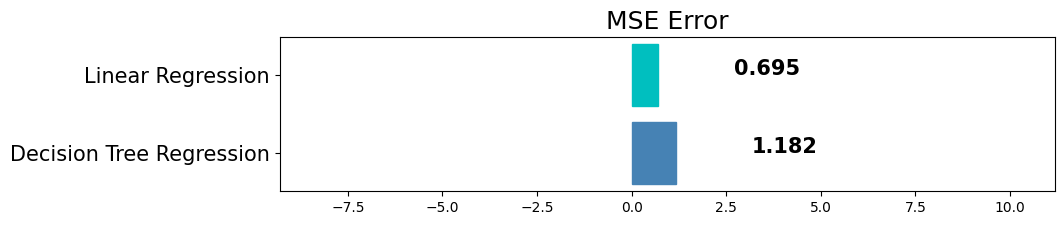

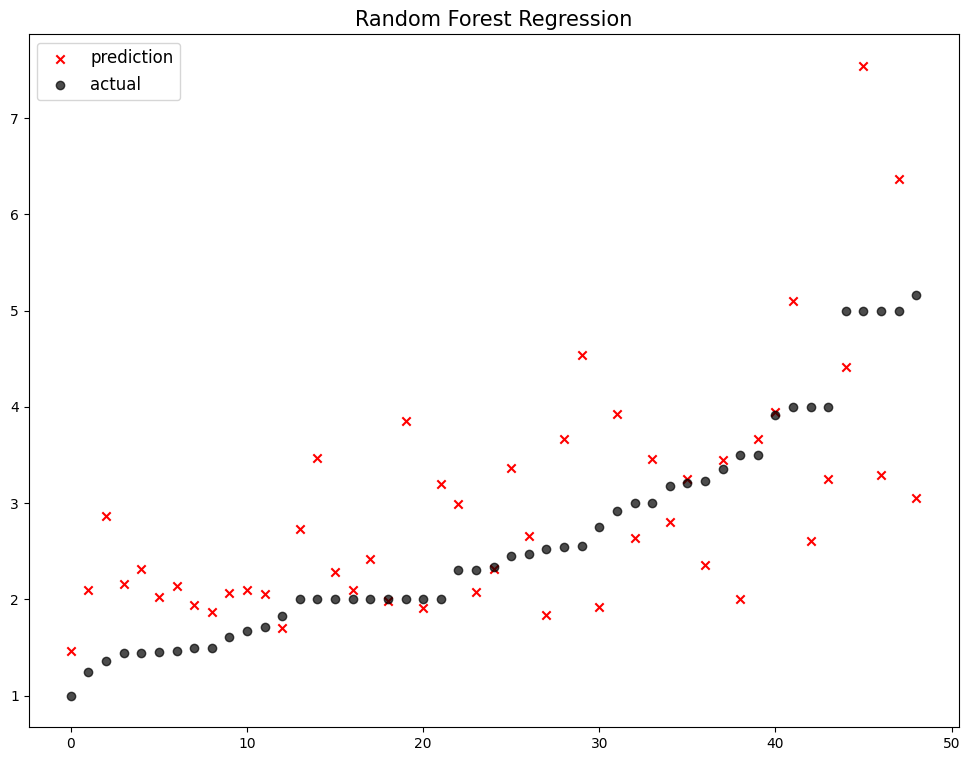

                      model       mse
0  Decision Tree Regression  1.181745
1  Random Forest Regression  0.938707
2         Linear Regression  0.694813


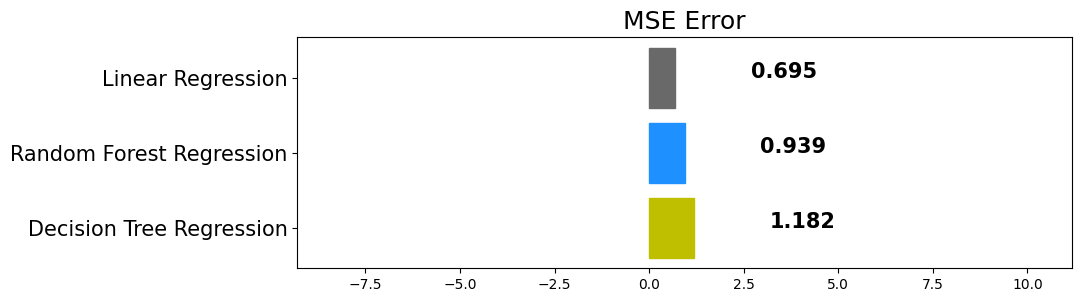

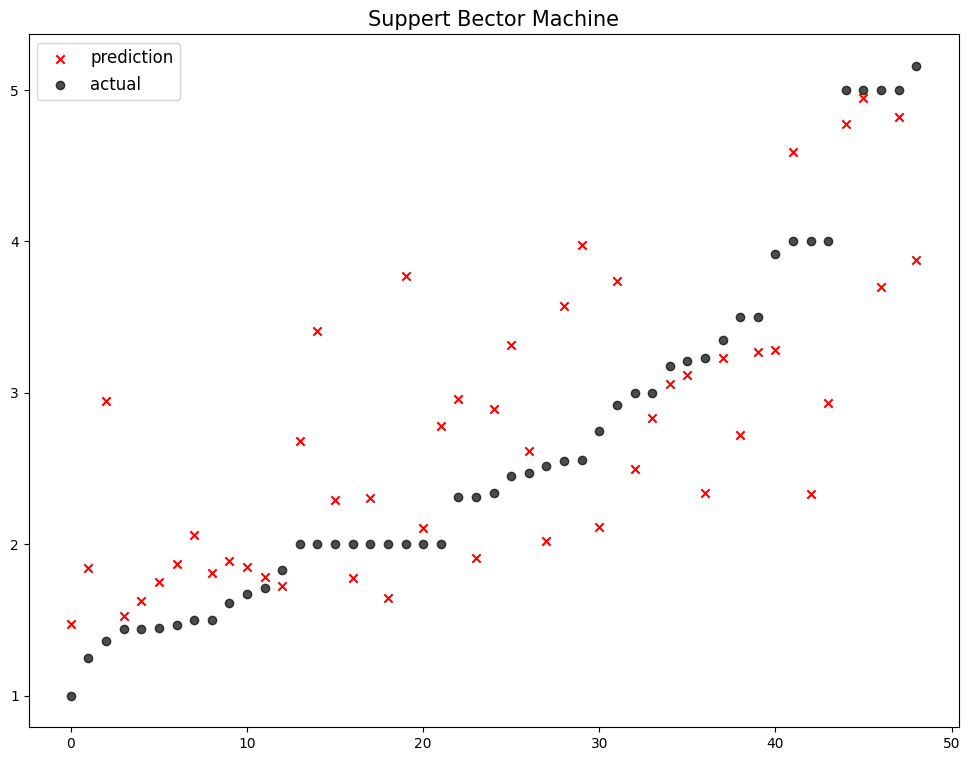

                      model       mse
0  Decision Tree Regression  1.181745
1  Random Forest Regression  0.938707
2         Linear Regression  0.694813
3    Suppert Bector Machine  0.538322


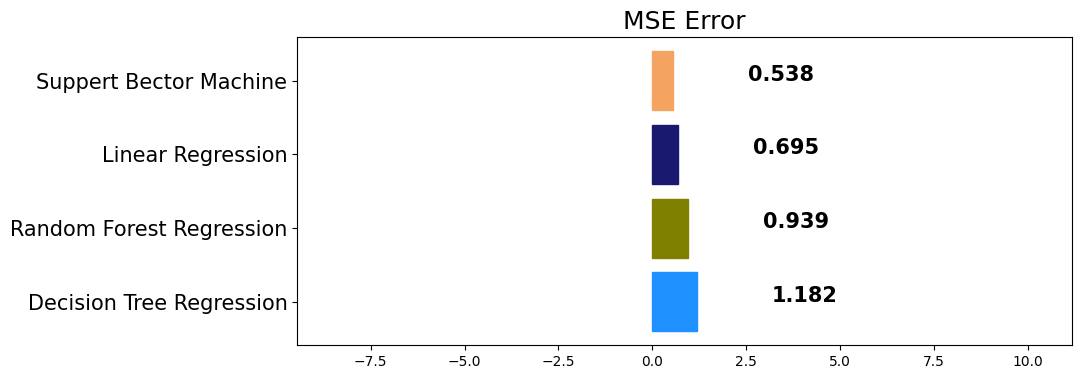

NameError: ignored

In [18]:
# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']
def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)
  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()
def mse_eval(name_, pred, actual):
  global my_predictions
  global colors
  plot_predictions(name_, pred, actual)
  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse
  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)
  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10
  length = len(df)
  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])
  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)
  plt.show()

model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred
rs1 = np.sqrt(mean_squared_error(y_test,pred))
rs1
mse_eval('Linear Regression', pred, y_test)

model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
pred2
rs2 = np.sqrt(mean_squared_error(y_test,pred2))
rs2
mse_eval('Decision Tree Regression', pred2, y_test)

model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)
pred3
rs3 = np.sqrt(mean_squared_error(y_test,pred3))
rs3
mse_eval('Random Forest Regression', pred3, y_test)

model4 = SVR()
model4.fit(X_train,y_train)
pred4 = model4.predict(X_test)
pred4
rs4 = np.sqrt(mean_squared_error(y_test,pred4))
rs4
mse_eval('Suppert Bector Machine', pred4, y_test)

model5 = LGBMRegressor()
model5.fit(X_train,y_train)
pred5 = model5.predict(X_test)
pred5
rs5 = np.sqrt(mean_squared_error(y_test,pred5))
rs5
mse_eval('lightGBM', pred5, y_test)

dict = { 'Linear Regression' : rs1,
        'Decision Tree Regression' : rs2,
         'Random Forest Regression ' : rs3,
         'Suppert Bector Machin' : rs4,
         'lightGBM' : rs5
}

res = [key for key in dict if all(dict[temp] >= dict[key] for temp in dict)]
# print(res)
min = {k : dict[k] for k in dict.keys() & set(res)}
print(min)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}
# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse
results

#  SVM 모델이 가장 정확도가 높았다.

In [61]:

# Now, let's use the model to predict tips for a new set of data
new_data = pd.DataFrame({
    'total_bill': [16.99],
    'sex': [0],
    'smoker': [0],
    'day': [2],
    'time': [0],
    'size': [2]
})

# Make predictions for the new data
new_tip_prediction = model4.predict(new_data)
print(f'추천 팁 금액: {new_tip_prediction}')

추천 팁 금액: [2.67193433]


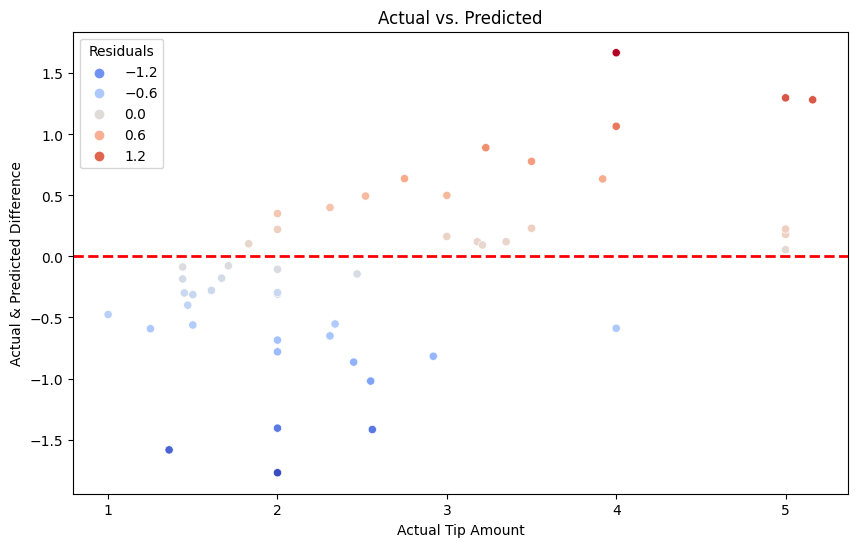

In [65]:
# 예측과 실제값의 차이 계산
residuals = y_test - pred4

# 시각화 - 예측과 실제값의 차이
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, hue=residuals, palette='coolwarm')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # 차이가 0인 수평선 추가
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Tip Amount')
plt.ylabel('Actual & Predicted Difference')
plt.legend(title='Residuals')
plt.show()
